In [1]:
import turtle
import numpy as np
import os
import time
import math
import sys
from math import pi
import subprocess
from PIL import Image, ImageDraw
from scipy.spatial import ConvexHull, convex_hull_plot_2d
import random

In [2]:
sys.path.append('..')
from py_models.geo_math import *
from py_models.draw_tools import *
from py_models.euclidean_spanner import EuclideanSpanner
from py_models.pointset import Pointset

In [3]:
PI = np.pi
PAPER_T = (3+4*PI)/3

In [4]:
def draw_pathgreedy_from_pointset(pointset, t=PAPER_T, random_tiebreak=False, img_w=300, img_h=300):
    pointset.print_all_to_file('temp_file.in')
    cmd = './printout_general_path_greedy_test ' + str(t)
    if random_tiebreak:
        cmd += ' -random'
    cmd += ' < temp_file.in > temp_file.out'
    output = subprocess.check_output(cmd, shell=True)

    print('Pointset is' + (' ' if are_convex(pointset.points) else ' NOT ') + 'convex')
    print(output)
    ret = draw_line_segments(get_segments_from_file('temp_file.out'), img_w, img_h, pointset=pointset)
    subprocess.check_call(['rm', 'temp_file.in'])
    subprocess.check_call(['rm', 'temp_file.out'])
    return ret

In [5]:
def draw_random_nonplane(t=PAPER_T, N=4, iter_count=1000, random_tiebreak=False, img_w=300, img_h=300):
    cmd = './random_grid_nonplane ' + str(t) + ' ' + str(N) + ' ' + str(iter_count) 
    cmd += ' > temp_file.out'
    output = subprocess.check_output(cmd, shell=True)

    ret = draw_line_segments(get_segments_from_file('temp_file.out'), img_w, img_h)
    subprocess.check_call(['rm', 'temp_file.out'])
    return ret

In [6]:
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

# for consistency with my other drawing, the y-axis here will be inverted
def plot_delaunay_from_pointset(pointset):
    points = np.array([refX(p) for p in pointset.points])
    tri = Delaunay(points)
    plt.triplot(points[:,0], points[:,1], tri.simplices)
    plt.plot(points[:,0], points[:,1], 'o')
    plt.show()

## Actual work

In [7]:
ps = Pointset(file_path='../pointsets/hand/example_not_plane.txt')

Pointset is convex
b''
N = 14
Planarity: NOT PLANAR
Max degree: 2
Stretch: 5.05151



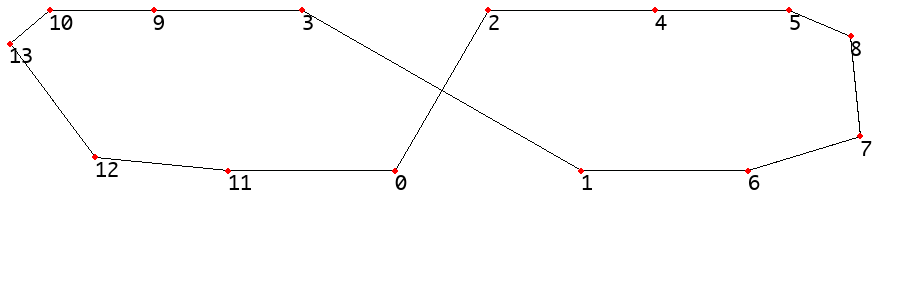

In [8]:
# Path-greedy
draw_pathgreedy_from_pointset(ps, img_w = 900)

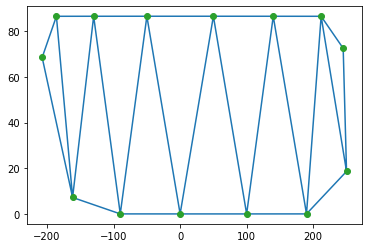

In [9]:
# Delaunay
plot_delaunay_from_pointset(ps)

###################################################################################################################
### Attempt: add the larges edge in the CH to try to break planarity. 
### Result: FAILED with counterexample

In [10]:
ps = Pointset(file_path='../pointsets/hand/example_not_plane.txt')
p = ps.points
p[8] = scale_vector(p[5], point_rotation(PI+0.2, p[4], p[5]), .5)
p[7] = scale_vector(p[6], point_rotation(PI-0.2, p[1], p[6]), .7)
newp = (p[8] + p[7]) / 2
newp = shift(newp, x=point_distance(p[1], p[2])*.6)
newp = scale_vector(p[8], point_rotation(PI+0.0001, p[5], p[8]),
                    100.01/point_distance(p[8], p[5]))
#p[7] = shift((p[6] + newp)/2, y=.001)

In [11]:
ps = Pointset(points=[*p, newp])
ps.add_before_edge([7, 14])

Pointset is convex
b''
N = 15
Planarity: NOT PLANAR
Max degree: 3
Stretch: 5.18034



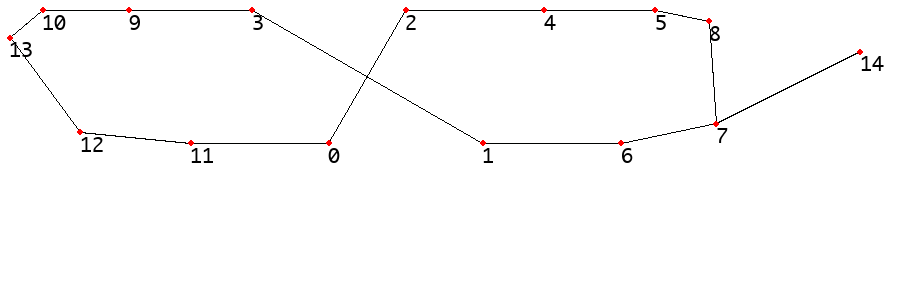

In [12]:
draw_pathgreedy_from_pointset(ps, img_w = 900)

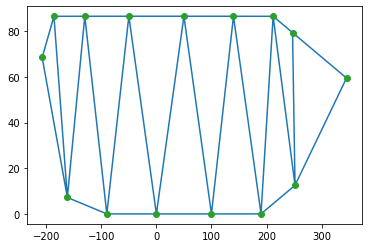

In [12]:
plot_delaunay_from_pointset(ps)

In [13]:
point_distance(ps.points[8], ps.points[14]) > point_distance(ps.points[1], ps.points[0])

True

In [14]:
point_distance(ps.points[7], ps.points[14])

104.68461208800922

In [15]:
###########################################################################################

Pointset is NOT convex
b''
N = 400
Planarity: PLANAR
Max degree: 4
Stretch: 3



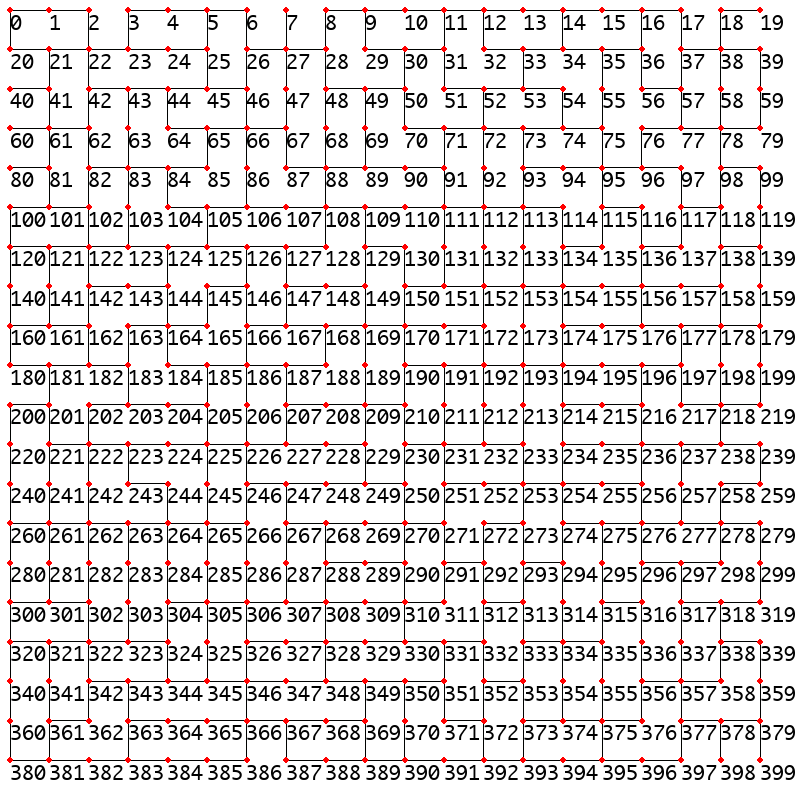

In [16]:
N = 20
points = [[j, i] for i in range(0, N) for j in range(0, N)]
ps = Pointset(points=points)
sz = 800
draw_pathgreedy_from_pointset(ps, t=3, random_tiebreak=True, img_w=sz, img_h=sz)

Pointset is NOT convex
b''
N = 100
Planarity: PLANAR
Max degree: 4
Stretch: 1.41421



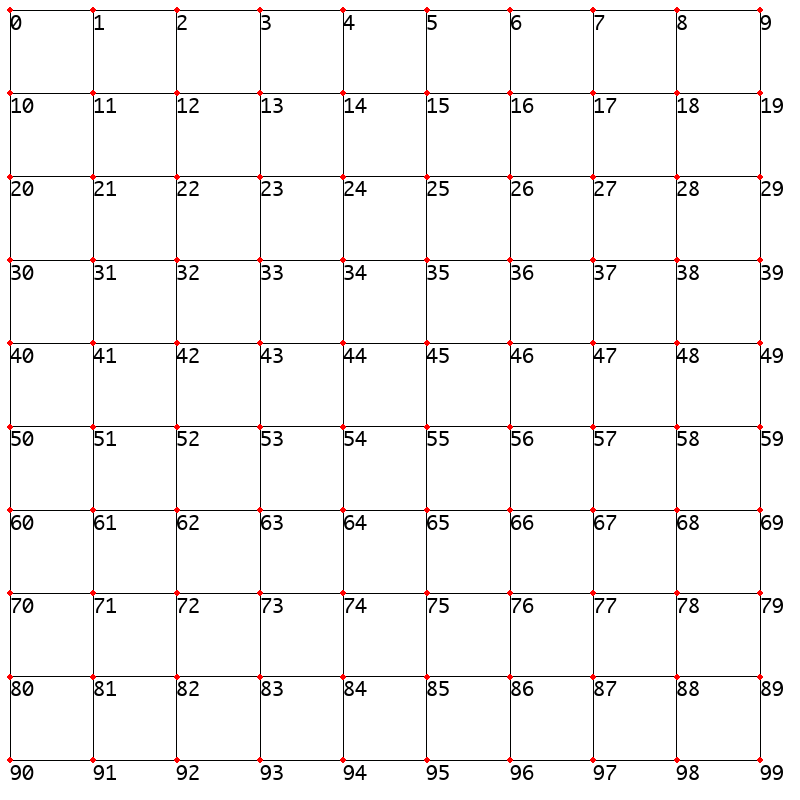

In [31]:
N = 10
points = [[j, i] for i in range(0, N) for j in range(0, N)]
ps = Pointset(points=points)
sz = 800
draw_pathgreedy_from_pointset(ps, t=2, random_tiebreak=True, img_w=sz, img_h=sz)

Pointset is NOT convex
b''
N = 400
Planarity: PLANAR
Max degree: 4
Stretch: 3



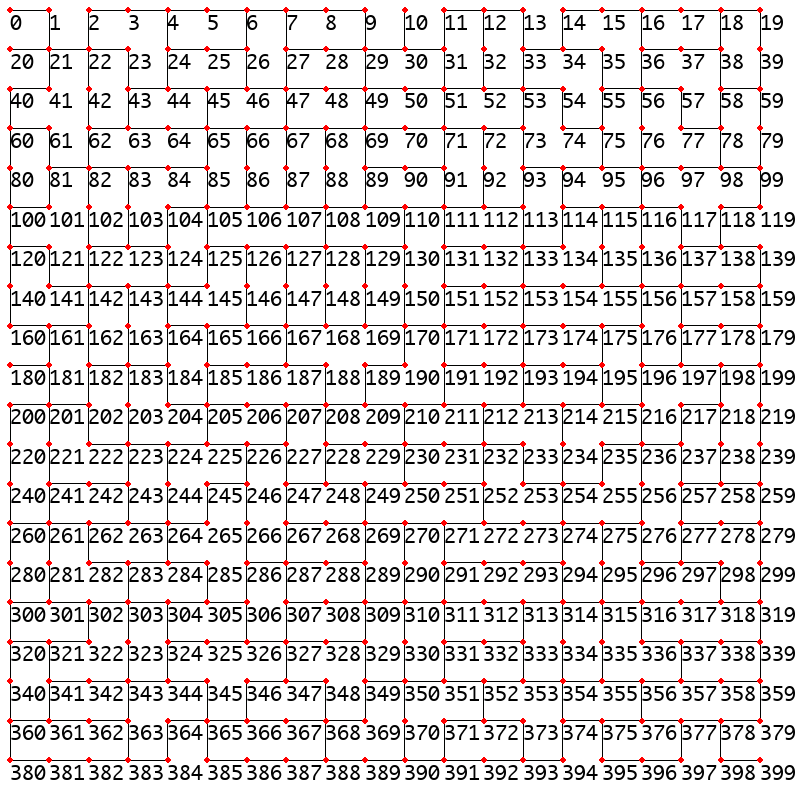

In [18]:
N = 20
points = [[j, i] for i in range(0, N) for j in range(0, N)]
ps = Pointset(points=points)
sz = 800
draw_pathgreedy_from_pointset(ps, t=3, random_tiebreak=True, img_w=sz, img_h=sz)

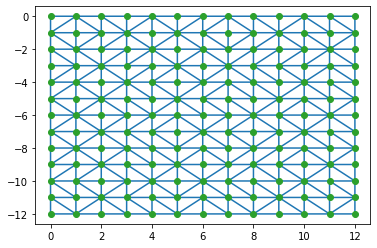

In [13]:
N = 13
points = [[j, i] for i in range(0, N) for j in range(0, N)]
ps = Pointset(points=points)
sz = 500
#draw_pathgreedy_from_pointset(ps, t=4, random_tiebreak=True, img_w=sz, img_h=sz)
plot_delaunay_from_pointset(ps)

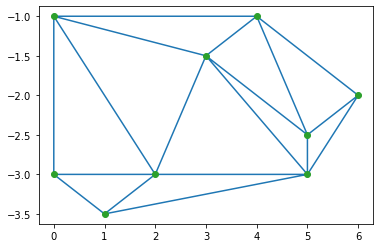

In [29]:
points = [[0, 1], [0, 3], [1, 3.5], [2, 3], [5, 3], [6, 2], [5, 2.5], [3, 1.5], [4, 1]]
ps = Pointset(points=points)
plot_delaunay_from_pointset(ps)

N = 64
Planarity: NOT PLANAR
Iterations taken: 3
Stretch: 3



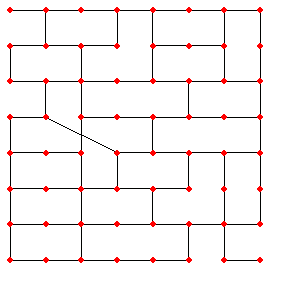

In [168]:
draw_random_nonplane(t=3, N=8, iter_count=10000)

N = 64
Planarity: NOT PLANAR
Iterations taken: 89875
Stretch: 5



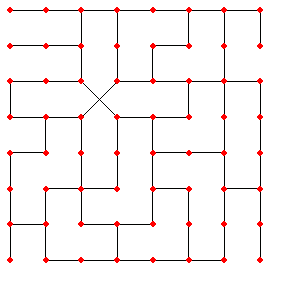

In [191]:
draw_random_nonplane(t=6, N=8, iter_count=100000)

N = 64
Planarity: NOT PLANAR
Iterations taken: 11919
t = 8; Stretch: 7



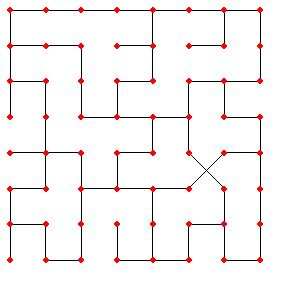

In [193]:
draw_random_nonplane(t=8, N=8, iter_count=100000)

In [30]:
draw_random_nonplane(t=10, N=9, iter_count=100000)

KeyboardInterrupt: 

N = 49
Planarity: NOT PLANAR
Iterations taken: 31
t = 3; Stretch: 3



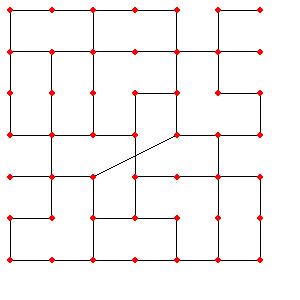

In [35]:
draw_random_nonplane(t=3, N=7, iter_count=1000)

N = 49
Planarity: NOT PLANAR
Iterations taken: 36
t = 3.1; Stretch: 3



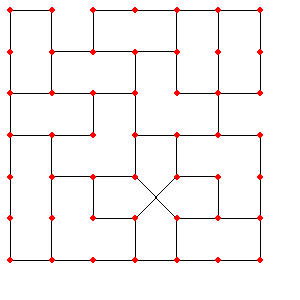

In [85]:
draw_random_nonplane(t=3.14, N=7, iter_count=10000)

N = 100
Planarity: NOT PLANAR
Iterations taken: 72
t = 4; Stretch: 3



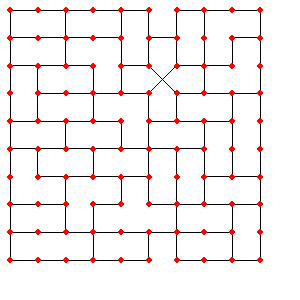

In [80]:
draw_random_nonplane(t=4, N=10)

In [70]:
def smallest_plus_N(t):
    return int(np.ceil(t/np.sqrt(2) + 1 + 0.000001))


def smallest_spiral_N(t):
    for k in range(0, t, 2):
        if (k+1)**2 <= t and (np.sqrt(2)*(k+1)**2 > t):
            return 2*(k+1)
    return -1  # this should never happen

In [75]:
for t in range(3, 150):
    print(str(t) + ': ' + str(smallest_plus_N(t)) + ',' + str(smallest_spiral_N(t)))

3: 4,-1
4: 4,-1
5: 5,-1
6: 6,-1
7: 6,-1
8: 7,-1
9: 8,6
10: 9,6
11: 9,6
12: 10,6
13: 11,-1
14: 11,-1
15: 12,-1
16: 13,-1
17: 14,-1
18: 14,-1
19: 15,-1
20: 16,-1
21: 16,-1
22: 17,-1
23: 18,-1
24: 18,-1
25: 19,10
26: 20,10
27: 21,10
28: 21,10
29: 22,10
30: 23,10
31: 23,10
32: 24,10
33: 25,10
34: 26,10
35: 26,10
36: 27,-1
37: 28,-1
38: 28,-1
39: 29,-1
40: 30,-1
41: 30,-1
42: 31,-1
43: 32,-1
44: 33,-1
45: 33,-1
46: 34,-1
47: 35,-1
48: 35,-1
49: 36,14
50: 37,14
51: 38,14
52: 38,14
53: 39,14
54: 40,14
55: 40,14
56: 41,14
57: 42,14
58: 43,14
59: 43,14
60: 44,14
61: 45,14
62: 45,14
63: 46,14
64: 47,14
65: 47,14
66: 48,14
67: 49,14
68: 50,14
69: 50,14
70: 51,-1
71: 52,-1
72: 52,-1
73: 53,-1
74: 54,-1
75: 55,-1
76: 55,-1
77: 56,-1
78: 57,-1
79: 57,-1
80: 58,-1
81: 59,18
82: 59,18
83: 60,18
84: 61,18
85: 62,18
86: 62,18
87: 63,18
88: 64,18
89: 64,18
90: 65,18
91: 66,18
92: 67,18
93: 67,18
94: 68,18
95: 69,18
96: 69,18
97: 70,18
98: 71,18
99: 72,18
100: 72,18
101: 73,18
102: 74,18
103: 74,18
104: 7